In [2]:
%%HTML

<div class='tableauPlaceholder' id='viz1512062244547' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;IP&#47;IPLDashboard_0&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='IPLDashboard_0&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;IP&#47;IPLDashboard_0&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1512062244547');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1520px';vizElement.style.height='1787px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [4]:
matches=pd.read_csv('matches.csv')   
delivery=pd.read_csv('deliveries.csv')
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [5]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [6]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
delivery.fillna(0,inplace=True)     #filling all the NaN values with 0

In [7]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [8]:
#Replacing the Team Names with their abbreviations

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [9]:
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :',matches['team1'].unique())

Total Matches Played: 636
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


In [10]:
print('Total venues played at:',matches['city'].nunique())
print('\nTotal umpires ',matches['umpire1'].nunique())

Total venues played at: 30

Total umpires  44


In [11]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
MI : has the highest number of match wins


In [12]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


In [13]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


In [14]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 toss_decision
field    62.911612
bat      47.313692
Name: count, dtype: float64


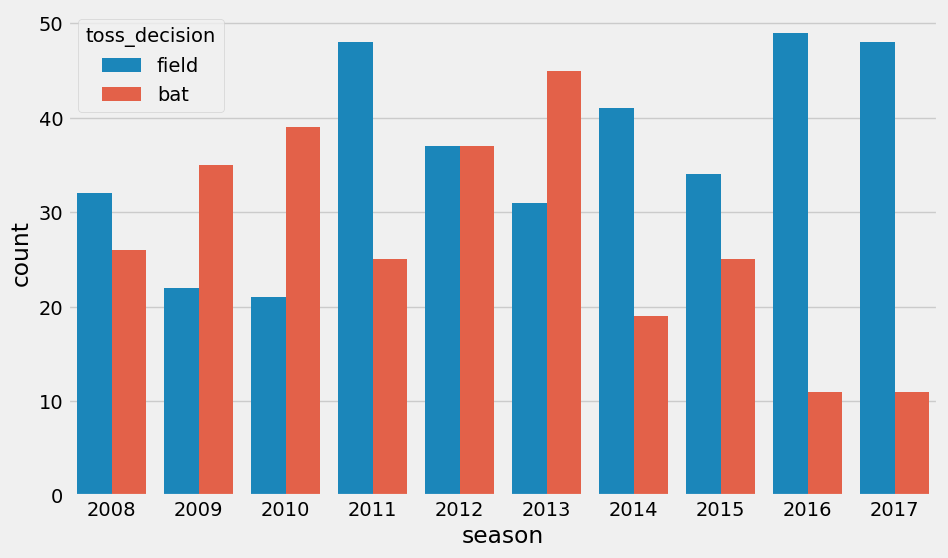

In [15]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

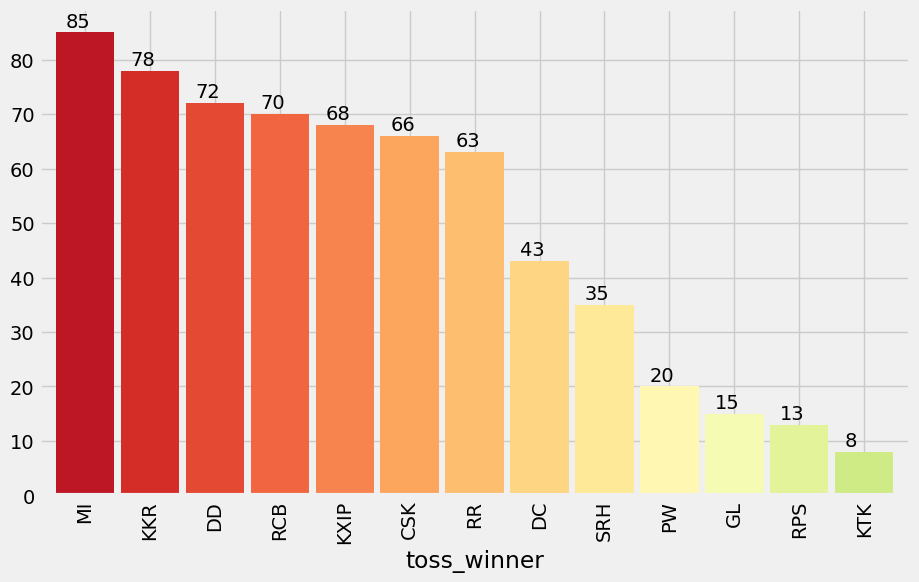

In [16]:
mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

In [17]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

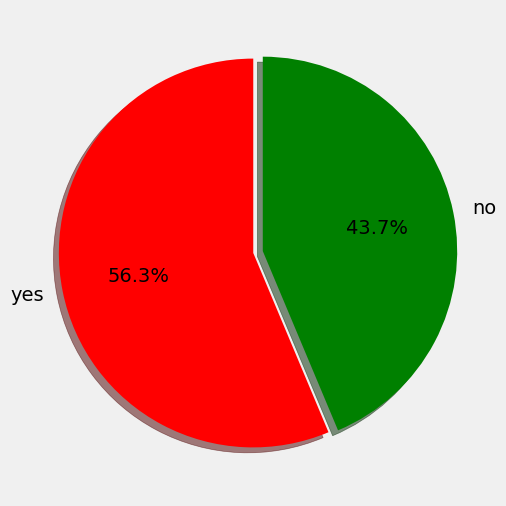

In [18]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

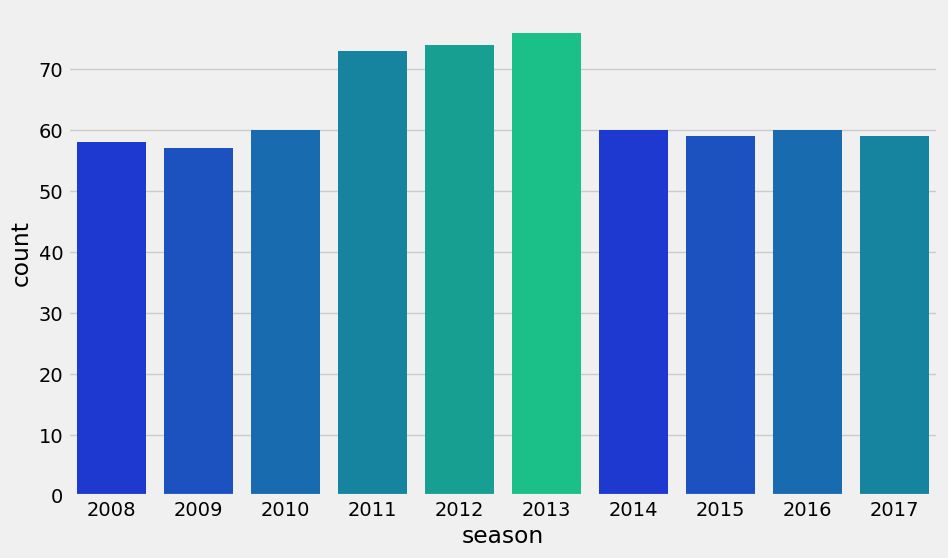

In [19]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
mlt.show()

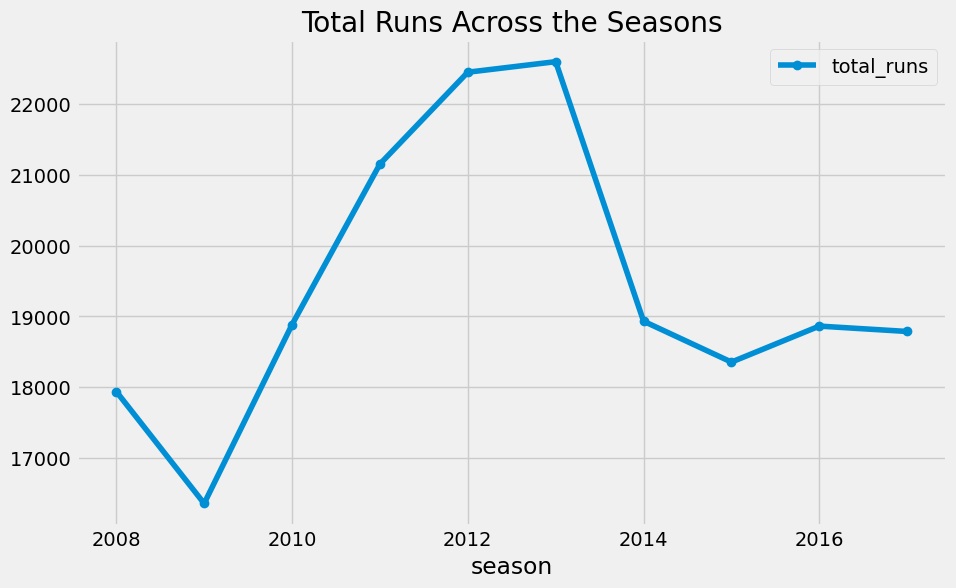

In [20]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.show()

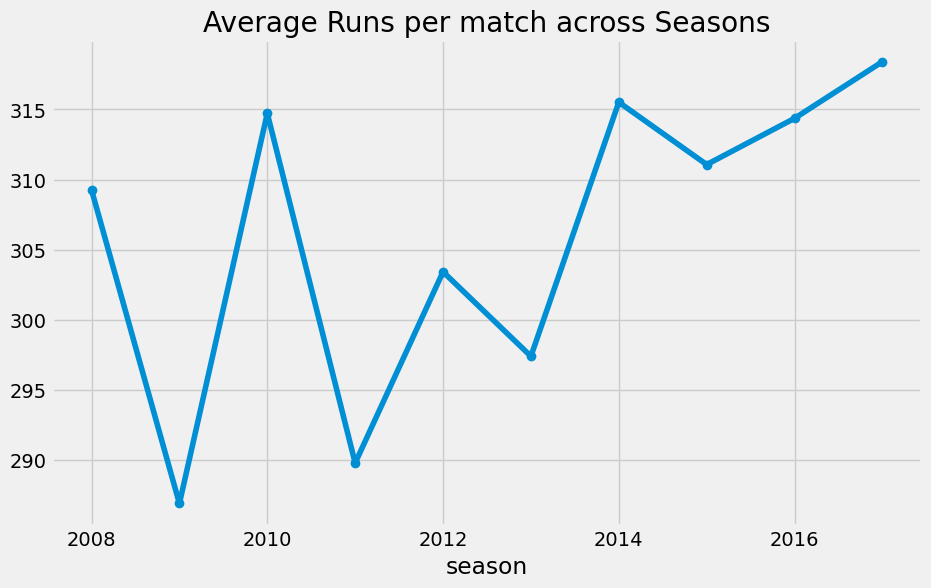

In [21]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.show()

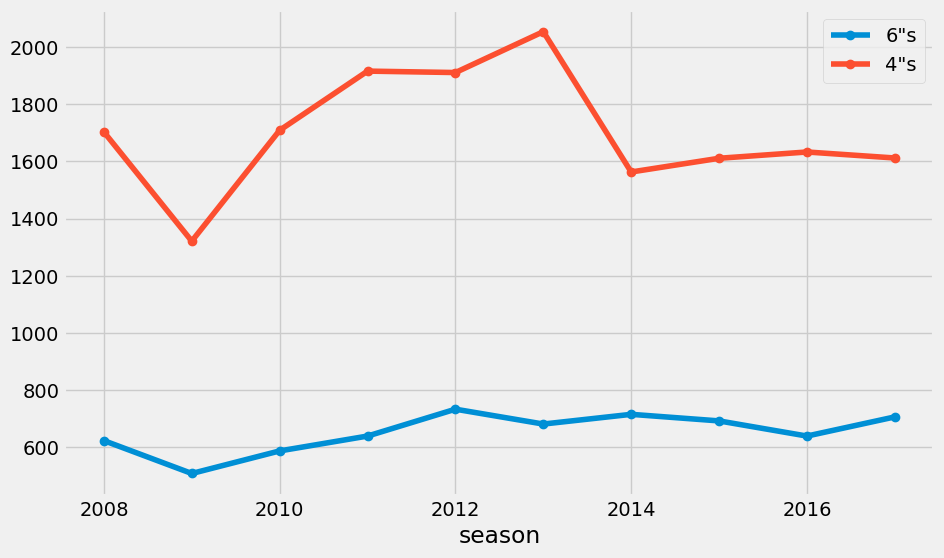

In [22]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

C:\Users\SC\AppData\Local\Temp\ipykernel_5952\1696738432.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



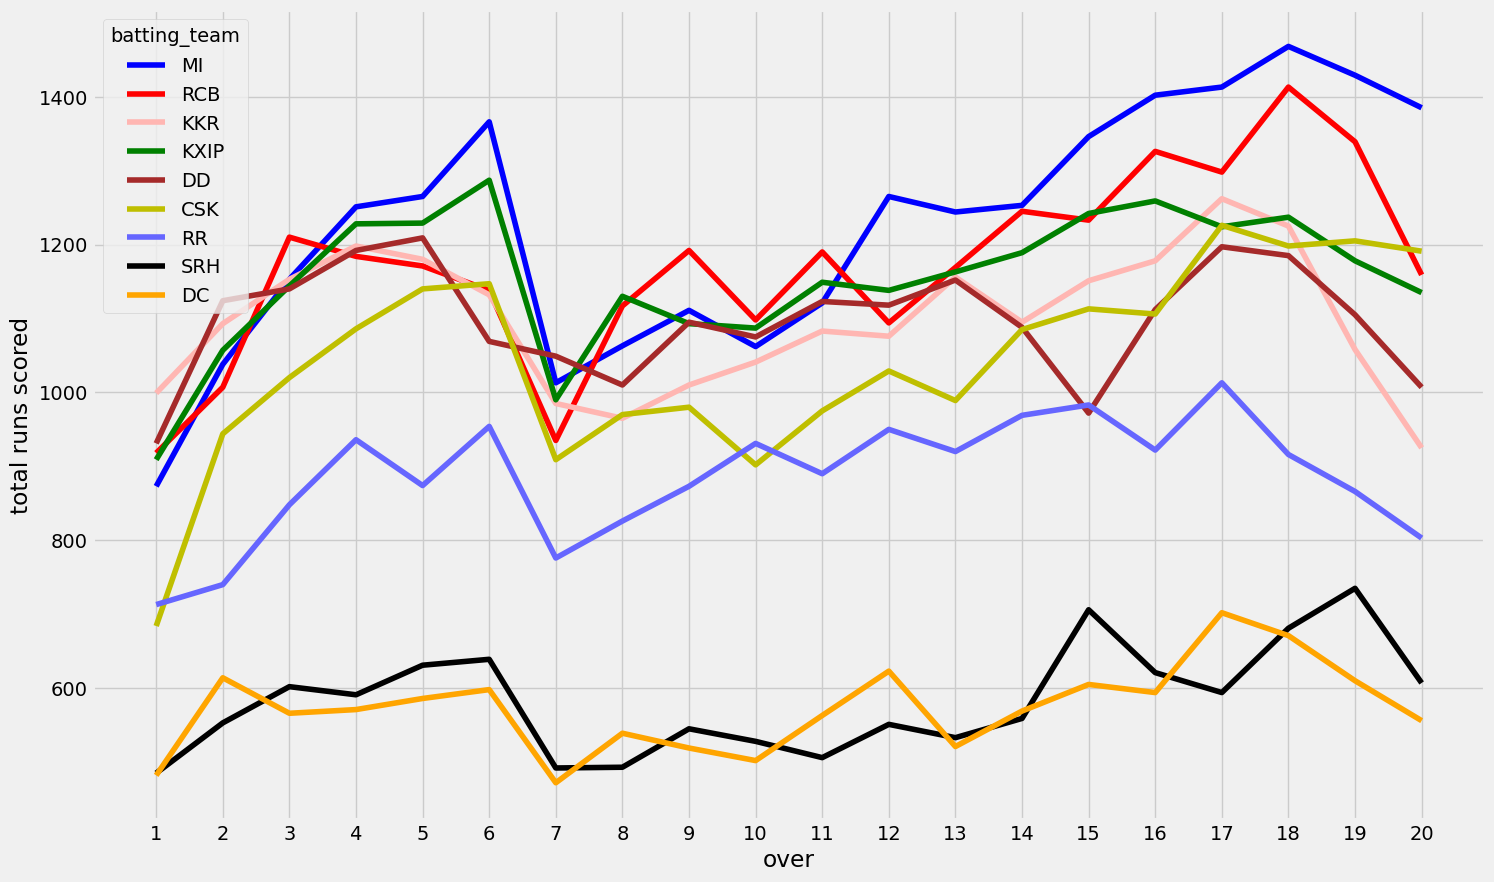

In [23]:
runs_per_over = delivery.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mlt.xticks(x)
mlt.ylabel('total runs scored')
fig=mlt.gcf()
fig.set_size_inches(16,10)
mlt.show()

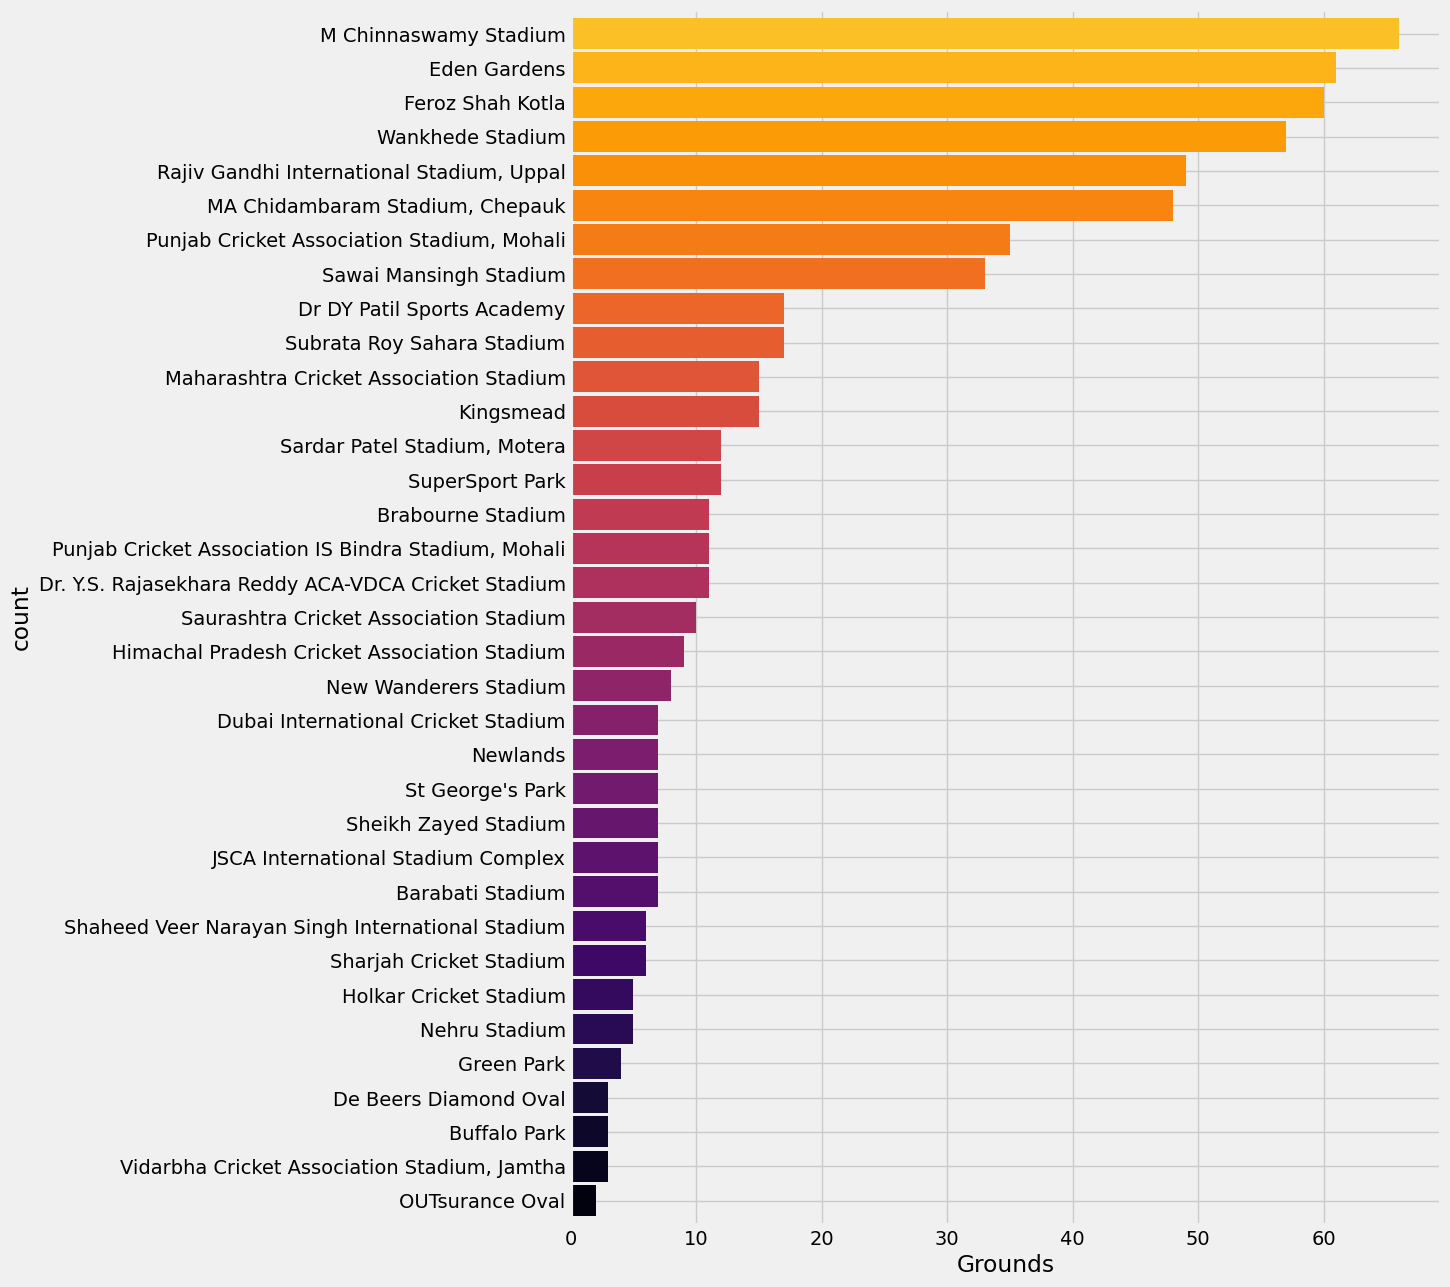

In [24]:
mlt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

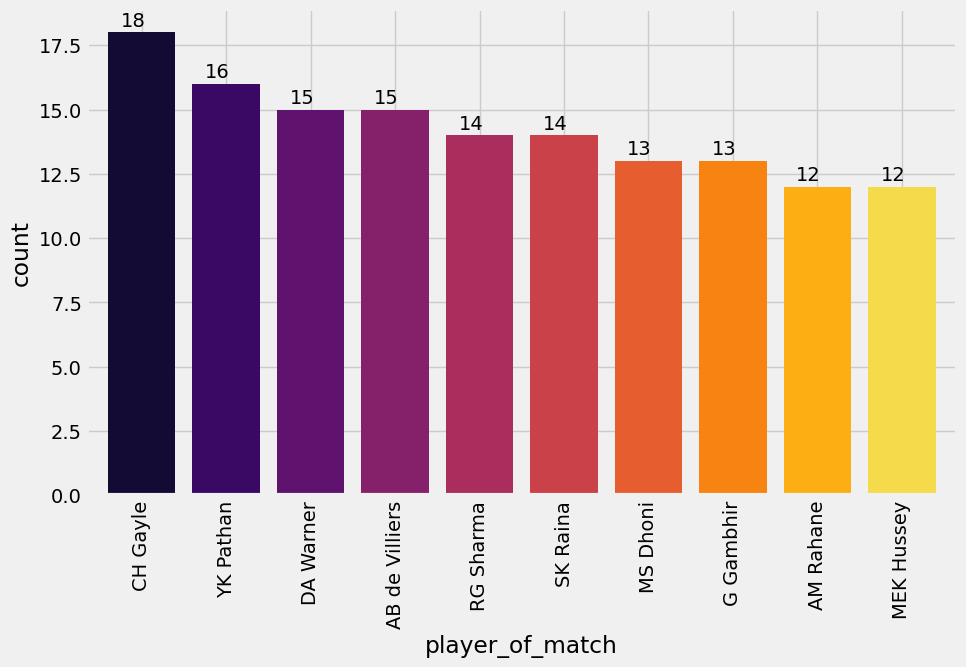

In [25]:
mlt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

### Winners by Year

In [26]:
print('Winners By Years')
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)
#getting the last match in every season since the last match will be the final match for the season

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


C:\Users\SC\AppData\Local\Temp\ipykernel_5952\960918047.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



### Super Over!

In [27]:
print('\n Total Matches with Super Overs:',delivery[delivery['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 7


In [28]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=delivery[delivery['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))

Teams who haven"t ever played a super over are: ['KTK', 'PW', 'RPS', 'DC']


### Favorite Umpires

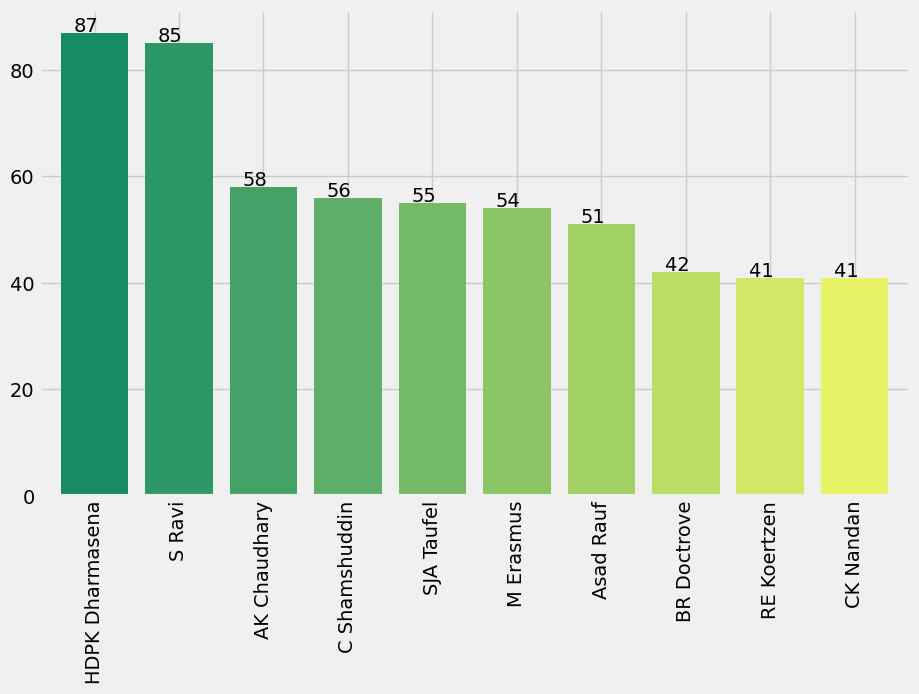

In [29]:
mlt.subplots(figsize=(10,6))
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

## Team1 vs Team2

### MI vs KKR

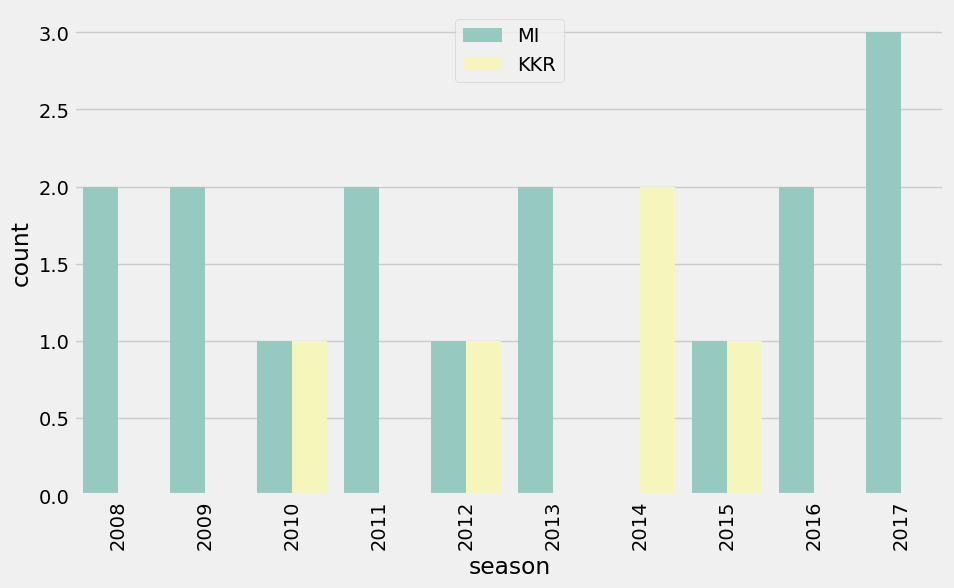

In [30]:
def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    mlt.xticks(rotation='vertical')
    leg = mlt.legend( loc = 'upper center')
    fig=mlt.gcf()
    fig.set_size_inches(10,6)
    mlt.show()
team1_vs_team2('KKR','MI')

### MI vs CSK

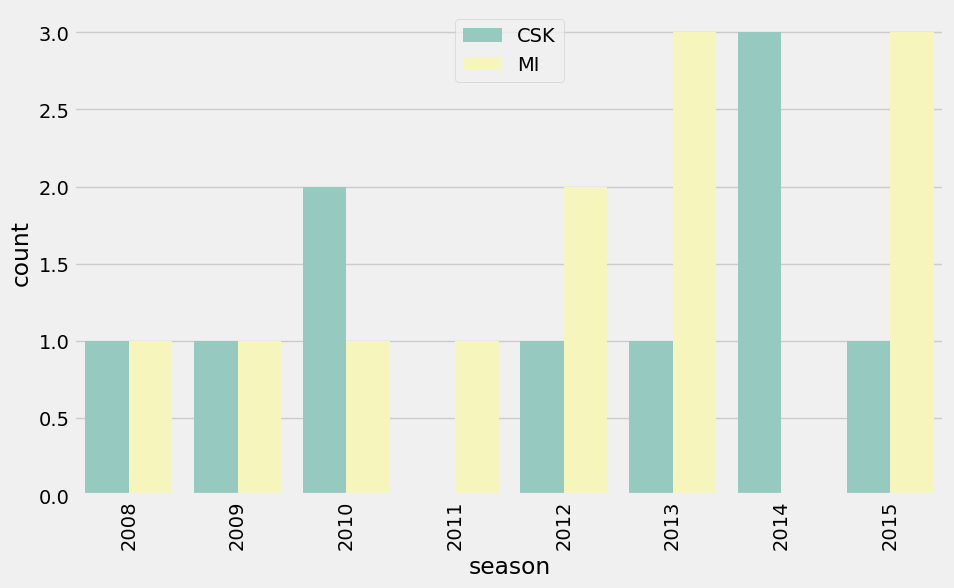

In [31]:
team1_vs_team2('CSK','MI')

### Matches Won By A Team Against Other Teams

In [32]:
def comparator(team1):
    teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)
    
comparator('MI')

winner  MI  KKR
count   16    5
winner  MI  RCB
count   13    8
winner  MI  DC
count    6   4
winner  MI  CSK
count   12   10
winner  MI  RR
count   10   6
winner  MI  DD
count   11   9
winner  MI  GL
count    2   2
winner  MI  KXIP
count   10    10
winner  MI  SRH
count    5    5
winner  RPS  MI
count     4   2
winner  KTK
count     1
winner  MI  PW
count    5   1


### Score Distribution For Teams by Innings

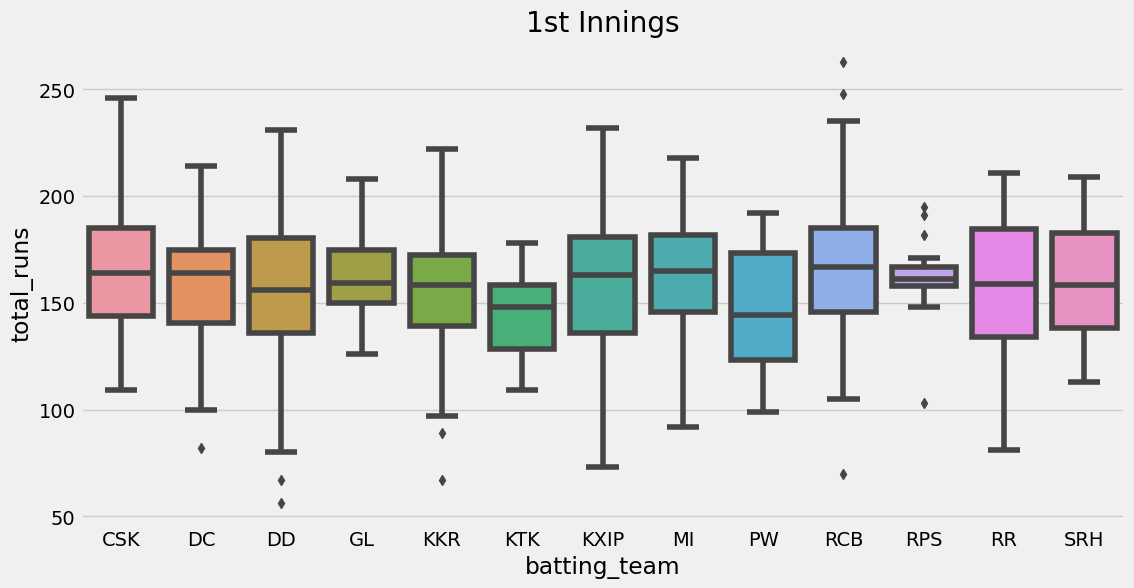

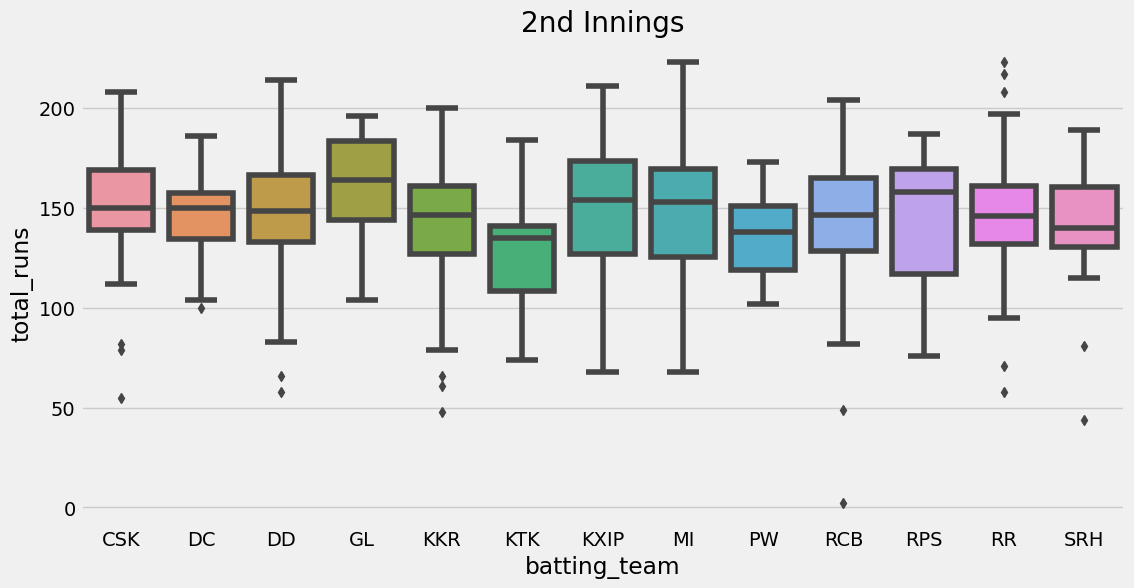

In [33]:
mlt.subplots(figsize=(12,6))
xyz=delivery.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
mlt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig=mlt.gcf()
fig.set_size_inches(12,6)

### 200+ Scores

In [34]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
596,296,1,KXIP,RCB,232
522,259,1,DD,KXIP,231
981,486,1,KXIP,CSK,231
100,50,1,KXIP,MI,230
1170,580,1,RCB,SRH,227


In [36]:
print('Teams who have"nt ever scored 200 runs',list(set(teams)-set(high_scores['batting_team'])))
print('Teams who haven"t conceeded over 200 while bowling',list(set(teams)-set(high_scores['bowling_team'])))

Teams who have"nt ever scored 200 runs ['KTK', 'PW', 'RPS']
Teams who haven"t conceeded over 200 while bowling ['KTK']


In [39]:
high=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()
high.columns
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high

count
inning batting_team bowling_team       
1      CSK          DD                1
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
                    RR                1
                    SRH               2
       DC           RR                1
       DD           KXIP              1
                    MI                1
                    RPS               1
       GL           DD                1
       KKR          DC                1
                    KXIP              1
                    RCB               1
       KXIP         CSK               2
                    MI                1
                    RCB               2
                    RR                1
       MI           CSK               1
                    DD                4
                    RCB               1
                    RR                1
       RCB          CSK               1
                    DD                1
                    GL                2
                    KXIP              3
                    MI                1
                    PW                1
                    RR                1
                    SRH               1
       RR           CSK               1
                    DD                1
                    KXIP              1
       SRH          KKR               1
                    KXIP              2
                    RCB               2
                    RR                1
2      CSK          KXIP              1
                    RCB               1
                    RR                1
       DD           GL                1
       KKR          KXIP              1
       KXIP         CSK               2
                    DD                1
                    KKR               1
                    SRH               1
       MI           CSK               1
                    KXIP              1
       RCB          KXIP              1
                    SRH               1
       RR           CSK               1
                    DC                1
                    MI                1

In [41]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
high_scores1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,SRH,RCB,207,2,172,no
8,9,1,DD,RPS,205,2,108,no
19,20,1,RCB,GL,213,2,192,no
31,32,1,SRH,KXIP,207,2,181,no
35,36,1,SRH,KKR,209,2,161,no


In [44]:
balls=delivery.groupby(['batsman'])['ball'].count().reset_index()
runs=delivery.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=delivery.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=delivery.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls.head()

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,DC,10
1,A Ashish Reddy,196,280,142.857143,16,15,SRH,36
2,A Chandila,7,4,57.142857,0,0,RR,4
3,A Chopra,75,53,70.666667,7,0,KKR,24
4,A Choudhary,20,25,125.000000,1,1,RCB,15


c:\Users\SC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



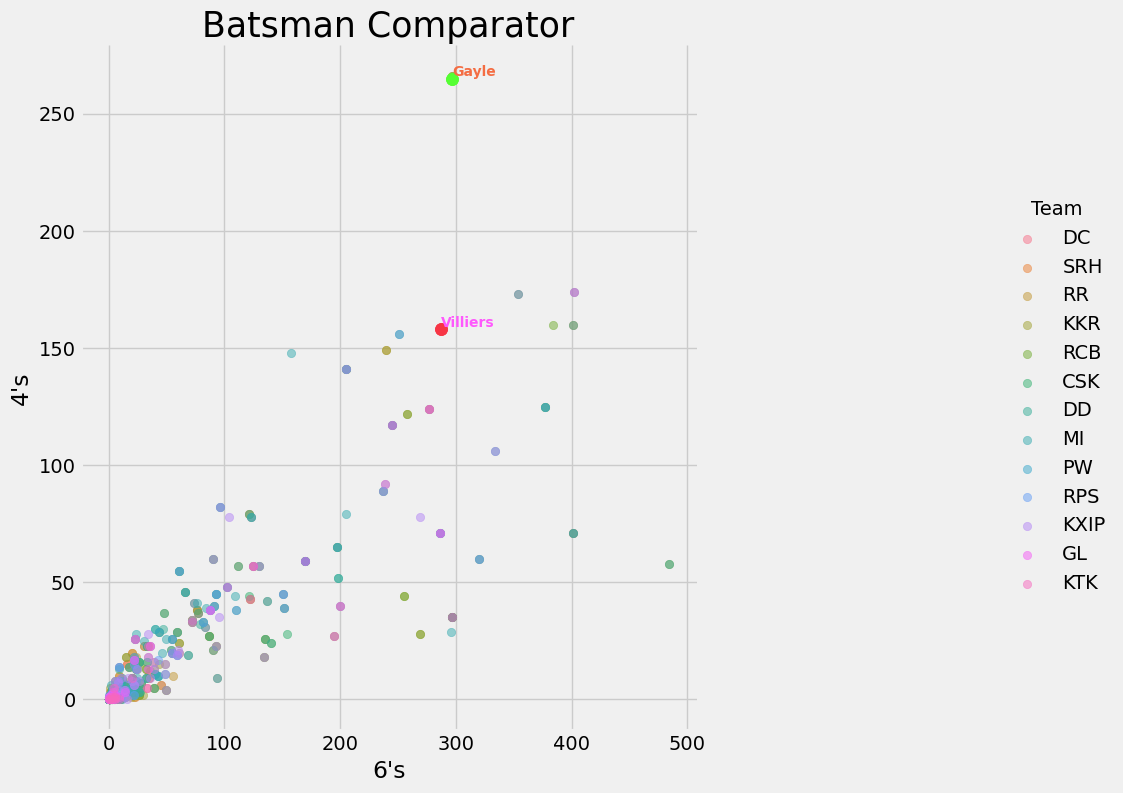

In [46]:
def batsman_comparator(stat1,stat2,batsman1,batsman2):
    sns.FacetGrid(balls,hue='Team').map(mlt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)
    mlt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    mlt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,
            fontsize=10, weight='bold', color='#f46d43')
    mlt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    mlt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2, 
            fontsize=10, weight='bold', color='#ff58fd')
    mlt.gcf().set_size_inches(15,10)
    mlt.title('Batsman Comparator',size=25)
    mlt.show()

batsman_comparator("6's","4's",'Gayle','Villiers') #comparing gayle and de-villiers based on their respective boundaries

c:\Users\SC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



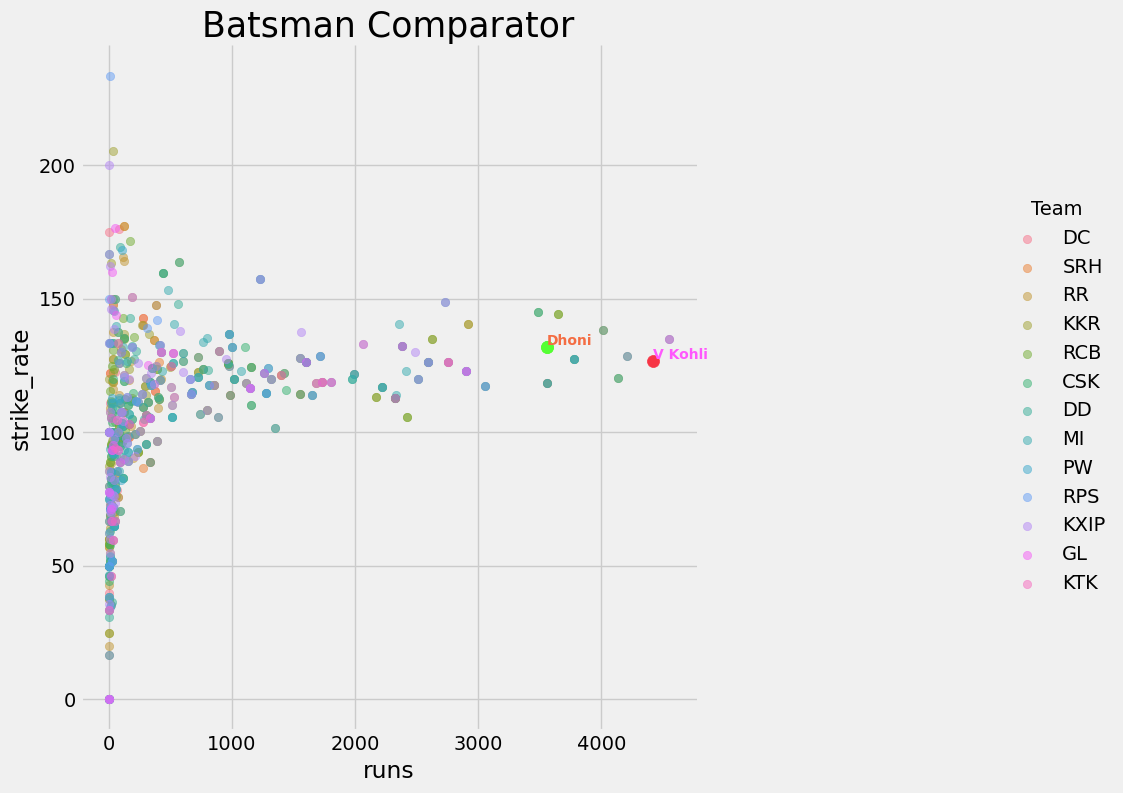

In [47]:
batsman_comparator("runs","strike_rate",'Dhoni','V Kohli')

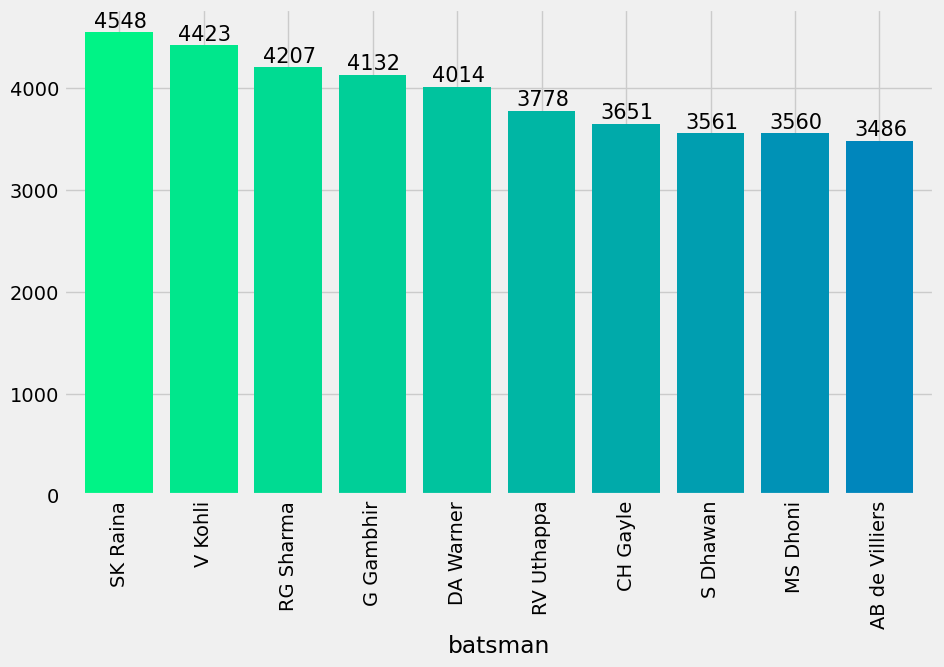

In [48]:
mlt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
mlt.show()

In [51]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\SC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\SC\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\SC\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

24.5% of the points cannot be placed; you 

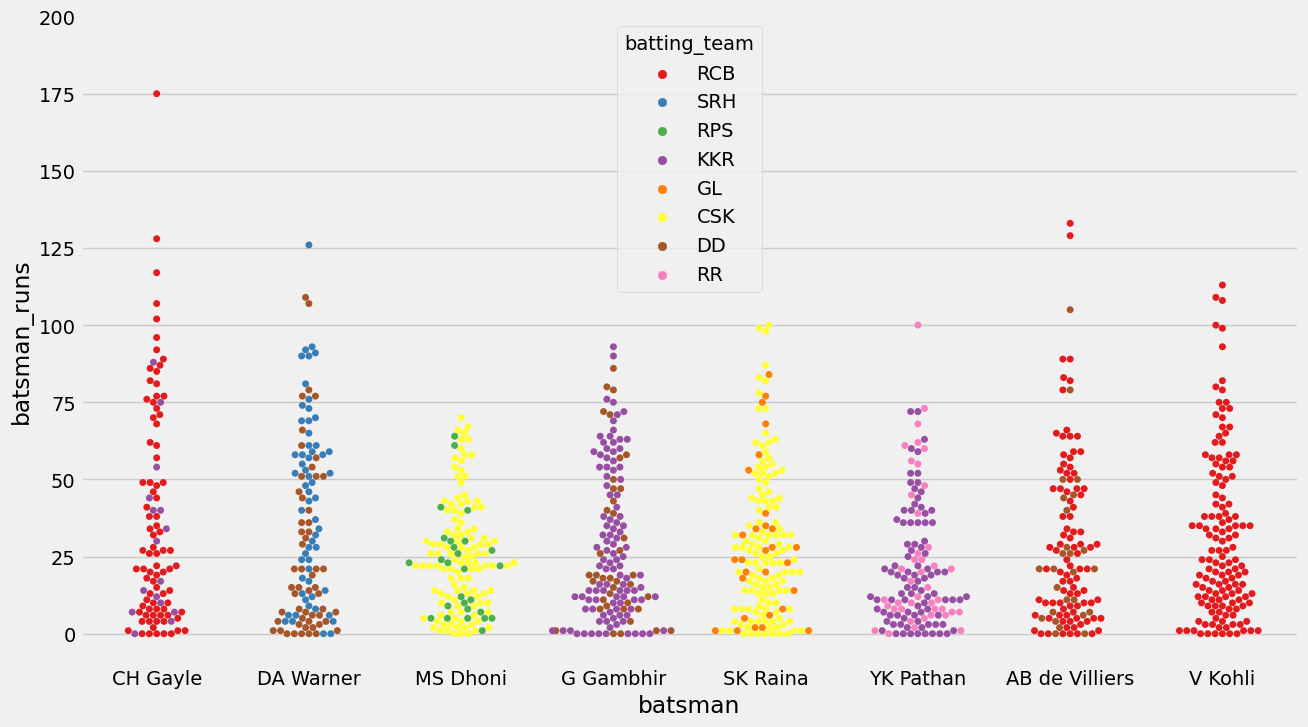

In [52]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=mlt.gcf()
fig.set_size_inches(14,8)
mlt.ylim(-10,200)
mlt.show()


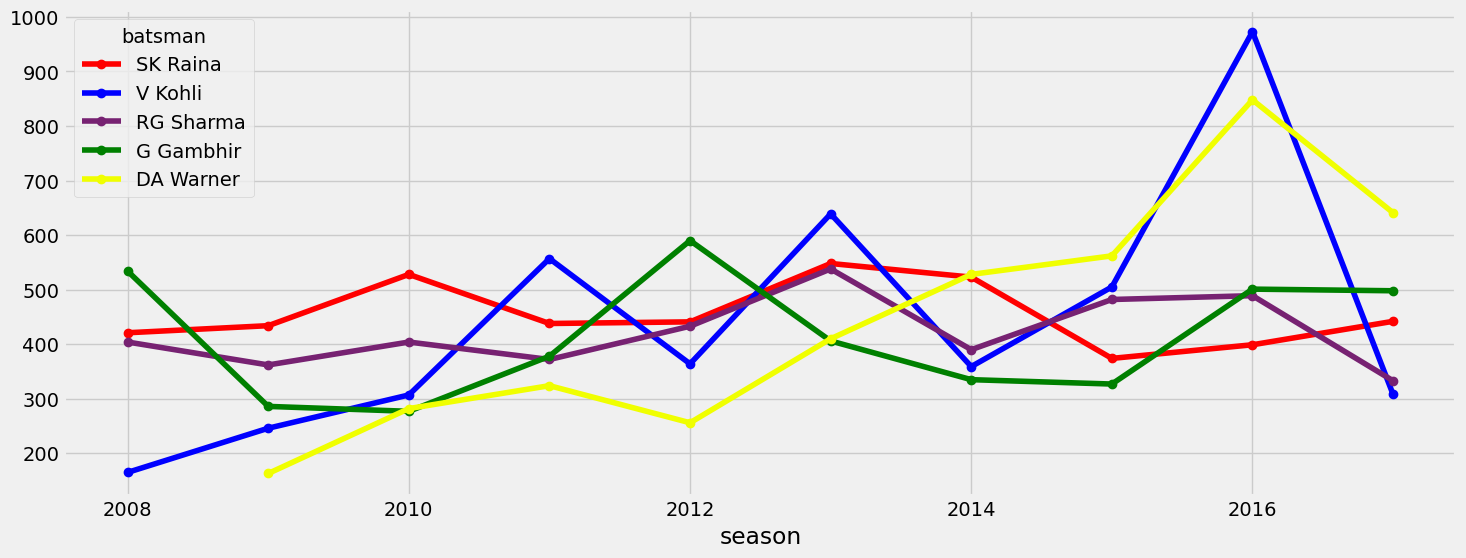

In [53]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=mlt.gcf()
fig.set_size_inches(16,6)
mlt.show()